In [ ]:
!pip install tritonclient

In [1]:
import tritonclient.grpc as grpcclient
from tritonclient.grpc import InferInput, InferRequestedOutput
from tritonclient.utils import triton_to_np_dtype
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [56]:
triton_client = grpcclient.InferenceServerClient(url='triton-triton-inference-server:8001', verbose=0)

model_info = {'name': 'mnist',
              'version': '1', }
              

# Get model metadata
metadata = triton_client.get_model_metadata(model_name=model_info['name'], model_version=model_info['version'])
# Print the metadata
print("Model Metadata:")
print(metadata)
print('*'*50)
config = triton_client.get_model_config(model_name=model_info['name'], model_version=model_info['version'])
print("Model Config:")
print(config)

Model Metadata:
name: "mnist"
versions: "1"
platform: "pytorch_libtorch"
inputs {
  name: "input"
  datatype: "FP32"
  shape: -1
  shape: 1
  shape: 28
  shape: 28
}
outputs {
  name: "output"
  datatype: "FP32"
  shape: -1
  shape: 10
}

**************************************************
Model Config:
config {
  name: "mnist"
  platform: "pytorch_libtorch"
  version_policy {
    latest {
      num_versions: 1
    }
  }
  max_batch_size: 256
  input {
    name: "input"
    data_type: TYPE_FP32
    dims: 1
    dims: 28
    dims: 28
  }
  output {
    name: "output"
    data_type: TYPE_FP32
    dims: 10
  }
  instance_group {
    name: "mnist"
    count: 1
    gpus: 0
    kind: KIND_GPU
  }
  default_model_filename: "model.pt"
  optimization {
    input_pinned_memory {
      enable: true
    }
    output_pinned_memory {
      enable: true
    }
  }
  backend: "pytorch"
}



(377, 480)


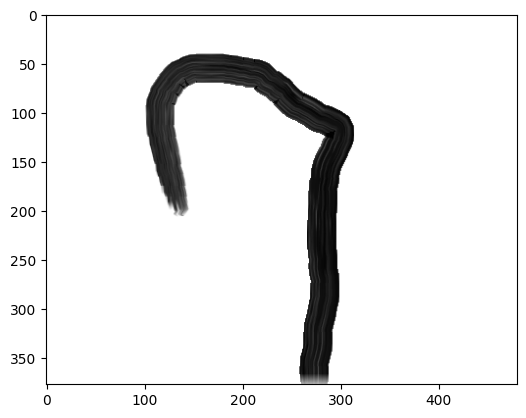

In [104]:
img = cv2.imread('7.png', cv2.IMREAD_GRAYSCALE)
print(img.shape)
plt.imshow(255 - img,cmap='binary')


(28, 28)


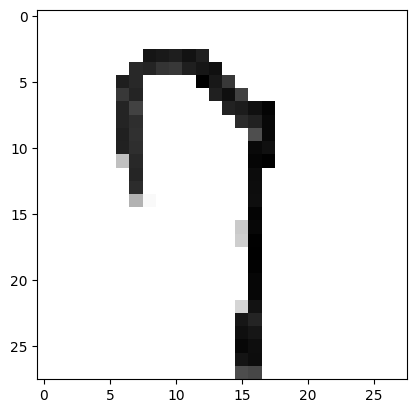

In [105]:
# image preprocess
img = cv2.resize(img, (28,28))
img = (255- img) / 255
print(img.shape)
plt.imshow(img, cmap='binary')
img_np = img.reshape(1 ,1,28,28).astype('float32')

In [106]:
inputs = []
inputs.append(grpcclient.InferInput('input', img_np.shape, 'FP32'))
inputs[0].set_data_from_numpy(img_np)
outputs = []
outputs.append(grpcclient.InferRequestedOutput('output'))
responses = []
response = triton_client.infer(model_name=model_info['name'], inputs=inputs, model_version = model_info['version'], outputs=outputs)


In [107]:
pred = response.as_numpy('output') 
mnist_classes = {}
print( np.argmax(pred,1) )

[7]
